In [1]:
import pandas as pd
import numpy as np
import pandas_gbq
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:

project_id = "mydata-365415"

sql = """
SELECT * 
FROM case_study_1.Cyclistic_data
"""
df = pandas_gbq.read_gbq(sql, project_id=project_id)

Downloading: 100%|██████████|


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6093429 entries, 0 to 6093428
Data columns (total 13 columns):
 #   Column              Dtype              
---  ------              -----              
 0   ride_id             object             
 1   rideable_type       object             
 2   started_at          datetime64[ns, UTC]
 3   ended_at            datetime64[ns, UTC]
 4   start_station_name  object             
 5   start_station_id    object             
 6   end_station_name    object             
 7   end_station_id      object             
 8   start_lat           float64            
 9   start_lng           float64            
 10  end_lat             float64            
 11  end_lng             float64            
 12  member_casual       object             
dtypes: datetime64[ns, UTC](2), float64(4), object(7)
memory usage: 604.4+ MB


In [4]:
df.rideable_type.unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [5]:
data = df.copy()

In [6]:
data.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1A8E7DE3DF23B62E,electric_bike,2022-07-07 09:46:55+00:00,2022-07-07 09:50:11+00:00,None,None,None,None,42.00,-87.66,42.0,-87.67,casual
1,EE680B15D4177F41,electric_bike,2022-07-10 18:46:29+00:00,2022-07-10 18:52:21+00:00,None,None,None,None,42.00,-87.66,42.0,-87.67,casual
2,423E2E6A32E06DB3,electric_bike,2022-09-15 16:55:23+00:00,2022-09-15 16:58:36+00:00,None,None,None,None,41.99,-87.70,42.0,-87.69,casual


In [7]:
data['latcol'] =  data.start_lat.astype(str) + " " + data.start_lng.astype(str)

data[data.start_station_name.isna() == True]


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,latcol
0,1A8E7DE3DF23B62E,electric_bike,2022-07-07 09:46:55+00:00,2022-07-07 09:50:11+00:00,None,None,None,None,42.00,-87.66,42.000000,-87.670000,casual,42.0 -87.66
1,EE680B15D4177F41,electric_bike,2022-07-10 18:46:29+00:00,2022-07-10 18:52:21+00:00,None,None,None,None,42.00,-87.66,42.000000,-87.670000,casual,42.0 -87.66
2,423E2E6A32E06DB3,electric_bike,2022-09-15 16:55:23+00:00,2022-09-15 16:58:36+00:00,None,None,None,None,41.99,-87.70,42.000000,-87.690000,casual,41.99 -87.7
3,7D35188F98409240,electric_bike,2022-09-23 10:52:53+00:00,2022-09-23 10:57:01+00:00,None,None,None,None,42.00,-87.67,42.000000,-87.660000,casual,42.0 -87.67
4,B3437AA5DC5F8897,electric_bike,2022-09-17 14:46:38+00:00,2022-09-17 15:19:49+00:00,None,None,None,None,41.99,-87.66,42.000000,-87.660000,casual,41.99 -87.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291173,5A1ADC6929407635,electric_bike,2022-08-11 23:45:29+00:00,2022-08-11 23:54:14+00:00,None,None,Leavitt St & Archer Ave,KA1503000068,41.83,-87.65,41.828792,-87.680604,casual,41.83 -87.65
5291174,DF7A3A9D46F82285,electric_bike,2022-09-03 12:02:15+00:00,2022-09-03 12:16:33+00:00,None,None,Leavitt St & Archer Ave,KA1503000068,41.83,-87.65,41.828792,-87.680604,member,41.83 -87.65
5291175,02A66A0096E0855B,electric_bike,2022-07-25 05:37:52+00:00,2022-07-25 05:43:14+00:00,None,None,Leavitt St & Archer Ave,KA1503000068,41.82,-87.69,41.828792,-87.680604,member,41.82 -87.69
5291176,FADF9873F1CE3C8F,electric_bike,2022-08-26 13:33:58+00:00,2022-08-26 13:46:23+00:00,None,None,Leavitt St & Archer Ave,KA1503000068,41.83,-87.68,41.828792,-87.680604,member,41.83 -87.68


In [8]:
start_latcol_na = data[data.start_station_name.isna() == True]
start_latcol_na['latcol'].unique()
pd.DataFrame(start_latcol_na['latcol'].unique()).head()

,0
0,42.0 -87.66
1,41.99 -87.7
2,42.0 -87.67
3,41.99 -87.66
4,41.98 -87.66


In [9]:
a = pd.DataFrame(start_latcol_na['latcol'].unique())
a.to_excel('start_lat_col.xlsx')

In [10]:
# criação da coluna duração passeio
duração_passeio = data['ended_at'] - data['started_at']
data.insert(loc = 4, column='duração_passeio', value= duração_passeio)
data.duração_passeio = data.duração_passeio.dt.seconds.div(60)

# criação da coluna dia da semana 
dia_da_semana = data.started_at.dt.dayofweek
data.insert(loc = 5, column='dia_da_semana', value= dia_da_semana)

# tirar _bike na coluna rideable_type
data.rideable_type = data.rideable_type.str.replace('_bike', '')
data = data.drop(['start_station_id','end_station_id'], axis=1) 



In [11]:
data.head()

,ride_id,rideable_type,started_at,ended_at,duração_passeio,dia_da_semana,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,latcol
0,1A8E7DE3DF23B62E,electric,2022-07-07 09:46:55+00:00,2022-07-07 09:50:11+00:00,3.266667,3,None,None,42.00,-87.66,42.0,-87.67,casual,42.0 -87.66
1,EE680B15D4177F41,electric,2022-07-10 18:46:29+00:00,2022-07-10 18:52:21+00:00,5.866667,6,None,None,42.00,-87.66,42.0,-87.67,casual,42.0 -87.66
2,423E2E6A32E06DB3,electric,2022-09-15 16:55:23+00:00,2022-09-15 16:58:36+00:00,3.216667,3,None,None,41.99,-87.70,42.0,-87.69,casual,41.99 -87.7
3,7D35188F98409240,electric,2022-09-23 10:52:53+00:00,2022-09-23 10:57:01+00:00,4.133333,4,None,None,42.00,-87.67,42.0,-87.66,casual,42.0 -87.67
4,B3437AA5DC5F8897,electric,2022-09-17 14:46:38+00:00,2022-09-17 15:19:49+00:00,33.183333,5,None,None,41.99,-87.66,42.0,-87.66,casual,41.99 -87.66


In [12]:
data.shape

(6093429, 14)

In [13]:
# limpeza dos dados
data.isna().sum() / len(data) * 100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
duração_passeio        0.000000
dia_da_semana          0.000000
start_station_name    15.264542
end_station_name      16.317069
start_lat              0.000000
start_lng              0.000000
end_lat                0.099533
end_lng                0.099533
member_casual          0.000000
latcol                 0.000000
dtype: float64

In [14]:
data.dropna(inplace= True)
data.shape

(4666232, 14)

In [15]:
data.head()

,ride_id,rideable_type,started_at,ended_at,duração_passeio,dia_da_semana,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,latcol
29045,4ABABA134ADD94C4,electric,2021-11-06 23:48:43+00:00,2021-11-07 01:17:36+00:00,88.883333,5,Monticello Ave & Chicago Ave,Monticello Ave & Chicago Ave,41.9,-87.72,41.900000,-87.720000,casual,41.9 -87.72
29048,BD381D68A7199FE5,electric,2022-08-09 02:57:12+00:00,2022-08-09 03:01:52+00:00,4.666667,1,Monticello Ave & Chicago Ave,Spaulding Ave & Division St,41.9,-87.72,41.902707,-87.709220,member,41.9 -87.72
29049,58411DCB47C85603,electric,2022-11-12 13:57:06+00:00,2022-11-12 14:01:49+00:00,4.716667,5,Monticello Ave & Chicago Ave,Conservatory Dr & Lake St,41.9,-87.72,41.885502,-87.716866,casual,41.9 -87.72
29050,F5E204D17ED88B9F,electric,2022-06-28 12:30:45+00:00,2022-06-28 12:34:09+00:00,3.400000,1,Monticello Ave & Chicago Ave,Conservatory Dr & Lake St,41.9,-87.72,41.885502,-87.716866,casual,41.9 -87.72
29051,1D63D5802483A110,electric,2022-08-23 07:28:27+00:00,2022-08-23 07:51:21+00:00,22.900000,1,Monticello Ave & Chicago Ave,Clark St & Schiller St,41.9,-87.72,41.907993,-87.631501,member,41.9 -87.72


In [16]:
dp = data[['duração_passeio']]
np.quantile(dp, 0.75)

18.816666666666666

In [17]:
# achando outliers
dp = data[['duração_passeio']]
q1= np.quantile(dp, 0.25)
q3= np.quantile(dp, 0.75)
IQR = q3 - q1
outliers = data[data['duração_passeio']< q3 + 1.5 * IQR]
outliers

,ride_id,rideable_type,started_at,ended_at,duração_passeio,dia_da_semana,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,latcol
29048,BD381D68A7199FE5,electric,2022-08-09 02:57:12+00:00,2022-08-09 03:01:52+00:00,4.666667,1,Monticello Ave & Chicago Ave,Spaulding Ave & Division St,41.900000,-87.720000,41.902707,-87.709220,member,41.9 -87.72
29049,58411DCB47C85603,electric,2022-11-12 13:57:06+00:00,2022-11-12 14:01:49+00:00,4.716667,5,Monticello Ave & Chicago Ave,Conservatory Dr & Lake St,41.900000,-87.720000,41.885502,-87.716866,casual,41.9 -87.72
29050,F5E204D17ED88B9F,electric,2022-06-28 12:30:45+00:00,2022-06-28 12:34:09+00:00,3.400000,1,Monticello Ave & Chicago Ave,Conservatory Dr & Lake St,41.900000,-87.720000,41.885502,-87.716866,casual,41.9 -87.72
29051,1D63D5802483A110,electric,2022-08-23 07:28:27+00:00,2022-08-23 07:51:21+00:00,22.900000,1,Monticello Ave & Chicago Ave,Clark St & Schiller St,41.900000,-87.720000,41.907993,-87.631501,member,41.9 -87.72
29052,E6DE9D37958CD864,electric,2022-08-01 15:37:35+00:00,2022-08-01 15:59:37+00:00,22.033333,0,Monticello Ave & Chicago Ave,Wells St & Hubbard St,41.900000,-87.720000,41.889906,-87.634266,member,41.9 -87.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093417,54C1329783DA0E3B,electric,2022-06-25 16:40:14+00:00,2022-06-25 16:47:44+00:00,7.500000,5,Base - 2132 W Hubbard,Spaulding Ave & Armitage Ave,41.924681,-87.700630,41.917108,-87.710221,casual,41.92468071 -87.700630069
6093419,CA2A9161B5D2599C,electric,2022-06-29 21:57:59+00:00,2022-06-29 22:13:56+00:00,15.950000,2,Base - 2132 W Hubbard,Lockwood Ave & Wrightwood Ave,41.927297,-87.785263,41.930000,-87.760000,member,41.927297 -87.78526283333333
6093421,ECF66E02A1B17D9A,electric,2022-08-21 13:05:28+00:00,2022-08-21 13:14:05+00:00,8.616667,6,Base - 2132 W Hubbard,Lockwood Ave & Wrightwood Ave,41.923993,-87.751200,41.930000,-87.760000,casual,41.923993 -87.75119966666666
6093422,4C382EEAFD0E788A,electric,2022-06-29 14:34:58+00:00,2022-06-29 14:58:11+00:00,23.216667,2,Base - 2132 W Hubbard,Lockwood Ave & Wrightwood Ave,41.927840,-87.758363,41.930000,-87.760000,casual,41.92783983333333 -87.75836283333334


In [18]:
# media da de viagem
média_duracão_passeio = round(data.duração_passeio.mean(), 2)
duração_maxima_passeio = round(data.duração_passeio.max(), 2)
duração_minima_passeio = round(data.duração_passeio.min(), 2)
print(média_duracão_passeio)
print(duração_maxima_passeio)
print(duração_minima_passeio)

16.85
1439.98
0.0


In [19]:
data['member_casual'].value_counts()

member    2824494
casual    1841738
Name: member_casual, dtype: int64

<AxesSubplot:xlabel='member_casual', ylabel='count'>

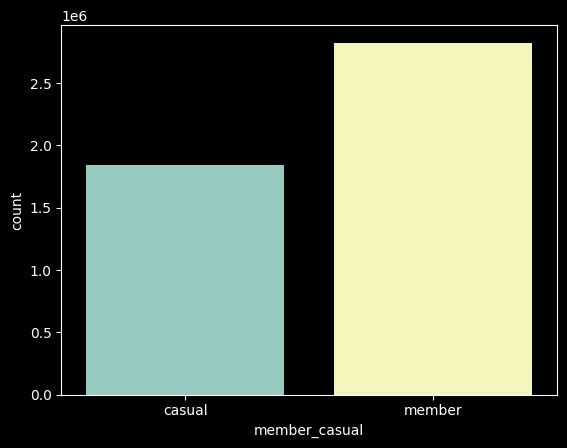

In [20]:
sns.countplot(data=data , x = 'member_casual')

In [21]:
resume =data.groupby('member_casual')['duração_passeio'].agg([np.mean, np.median, np.max, np.min]).reset_index()
resume

,member_casual,mean,median,amax,amin
0,casual,23.73375,13.833333,1439.983333,0.0
1,member,12.35931,8.916667,1439.933333,0.0


Text(0.5, 1.0, 'média de duração por passeio')

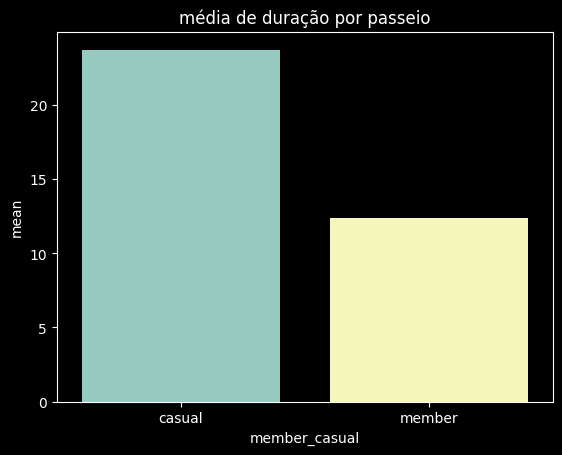

In [22]:
sns.barplot(data=resume, x ='member_casual', y='mean')
plt.title('média de duração por passeio')

In [23]:
# modo do dia da semanna
print(data[data['member_casual'] == 'casual']['dia_da_semana'].mode())
print(data[data['member_casual'] == 'member']['dia_da_semana'].mode())

0    5
Name: dia_da_semana, dtype: int64
0    2
Name: dia_da_semana, dtype: int64


In [24]:
resume1 =data.groupby(['dia_da_semana', 'member_casual'])['duração_passeio'].mean().reset_index()
resume1

,dia_da_semana,member_casual,duração_passeio
0,0,casual,24.298389
1,0,member,11.913198
2,1,casual,21.296207
3,1,member,11.688596
4,2,casual,20.467697
5,2,member,11.735596
6,3,casual,21.081589
7,3,member,11.949690
8,4,casual,22.203626
9,4,member,12.119475


<AxesSubplot:xlabel='member_casual', ylabel='duração_passeio'>

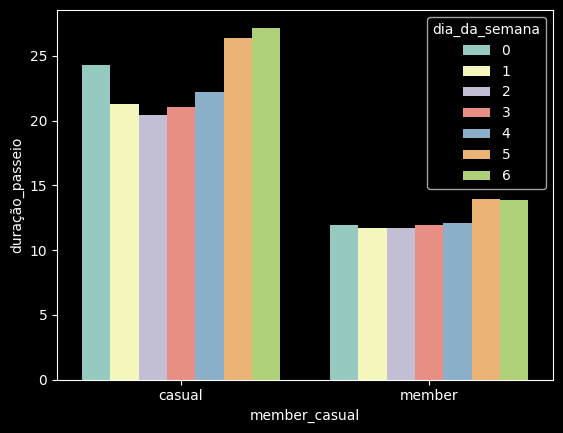

In [25]:
sns.barplot(data=resume1, x = 'member_casual', y = 'duração_passeio', hue ='dia_da_semana')

Text(0.5, 1.0, 'duração passeio para usuários por dia da semana')

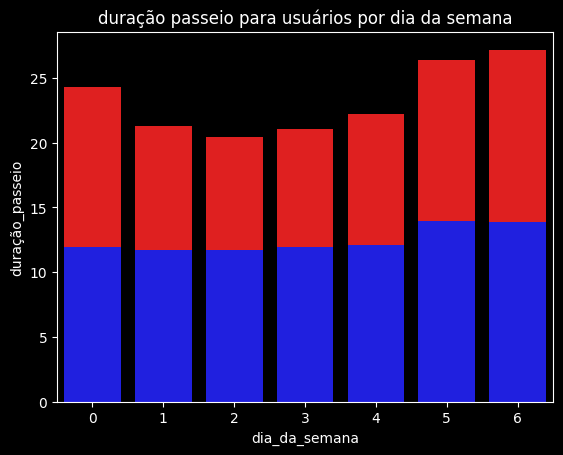

In [26]:
s1 = sns.barplot(data=resume1 , x = 'dia_da_semana', y = resume1[resume1['member_casual']== 'casual']['duração_passeio'], color = 'red')
s2 = sns.barplot(data=resume1 , x = 'dia_da_semana', y = resume1[resume1['member_casual']== 'member']['duração_passeio'], color = 'blue')
plt.title('duração passeio para usuários por dia da semana')

In [27]:
print(data['start_station_name'].mode())
print(data['end_station_name'].mode())

0    Streeter Dr & Grand Ave
Name: start_station_name, dtype: object
0    Streeter Dr & Grand Ave
Name: end_station_name, dtype: object


In [28]:
data['new'] = data.start_station_name + " - " + data.end_station_name
nride_casual = data[data['member_casual'] == 'casual'].groupby(['dia_da_semana','new']).agg({'ride_id':'count'}).reset_index()
nride_casual

,dia_da_semana,new,ride_id
0,0,111th St - Morgan Park Metra - Racine Ave & 10...,1
1,0,111th St - Morgan Park Metra - Western Ave & 1...,1
2,0,2112 W Peterson Ave - 2112 W Peterson Ave,8
3,0,2112 W Peterson Ave - Broadway & Argyle St,1
4,0,2112 W Peterson Ave - Broadway & Ridge Ave,5
...,...,...,...
416777,6,Yates Blvd & 75th St - Stony Island Ave & 75th St,7
416778,6,Yates Blvd & 75th St - University Ave & 57th St,1
416779,6,Yates Blvd & 75th St - Yates Blvd & 75th St,8
416780,6,Yates Blvd & 93rd St - Ellis Ave & 83rd St,1


In [29]:
#sns.barplot(data = nride_casual, x = 'ride_id', y ='new')

In [30]:
nride_member = data[data['member_casual'] == 'member'].groupby('new').agg({'ride_id':'count'}).reset_index().nlargest(5, 'ride_id')
nride_member

,new,ride_id
49406,Ellis Ave & 60th St - University Ave & 57th St,6801
127277,University Ave & 57th St - Ellis Ave & 60th St,6435
49335,Ellis Ave & 60th St - Ellis Ave & 55th St,5914
49108,Ellis Ave & 55th St - Ellis Ave & 60th St,5345
16986,Calumet Ave & 33rd St - State St & 33rd St,3523


<AxesSubplot:xlabel='ride_id', ylabel='new'>

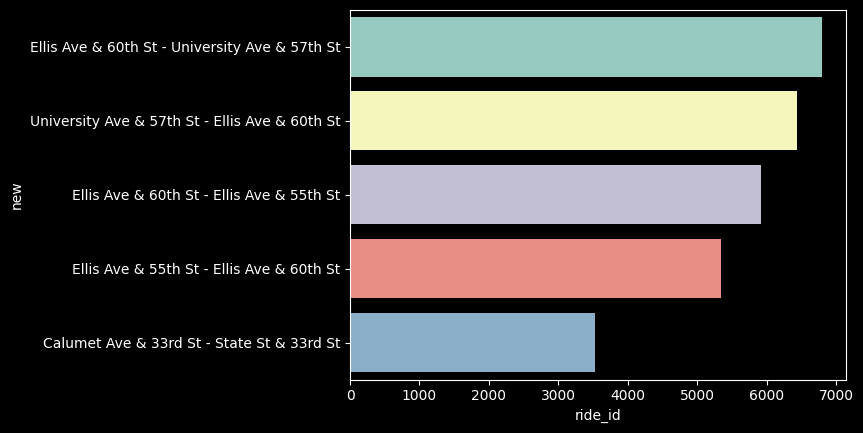

In [31]:
sns.barplot(data = nride_member, x = 'ride_id', y ='new')